# Example of Classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples=1000

# Create_circles
X,y=make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
y.shape,X[:1].shape


((1000,), (1, 2))

In [6]:
import pandas as pd
Circles=pd.DataFrame({"X0": X[:,0],"X1":X[:,1],"label":y})
Circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


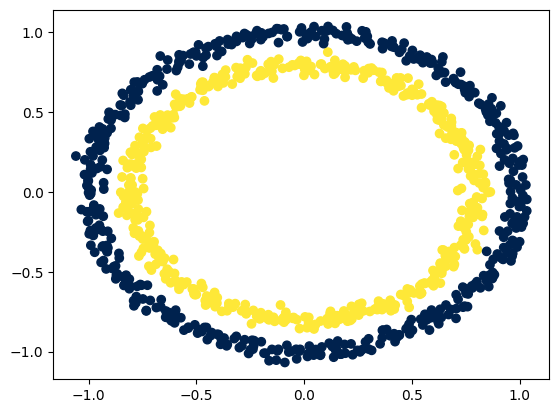

In [7]:
# visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap="cividis")

## Input and Output Shapes

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

## Steps in Modeling

In [9]:
import tensorflow as tf

In [10]:
type(X[1,0])

numpy.float64

In [11]:
tf.constant(X).dtype

tf.float64

In [12]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [13]:
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
# for classification problem, we can use accuracy as oiur evaluation metric
model.fit(tf.constant(X), tf.constant(y),epochs=42)

Epoch 1/42
32/32 [==============================] - 1s 3ms/step - loss: 5.9799 - accuracy: 0.4890
Epoch 2/42
32/32 [==============================] - 0s 3ms/step - loss: 5.7043 - accuracy: 0.4940
Epoch 3/42
32/32 [==============================] - 0s 3ms/step - loss: 3.3174 - accuracy: 0.4670
Epoch 4/42
32/32 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.5610
Epoch 5/42
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4960
Epoch 6/42
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4990
Epoch 7/42
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5180
Epoch 8/42
32/32 [==============================] - 0s 6ms/step - loss: 0.6946 - accuracy: 0.4710
Epoch 9/42
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4870
Epoch 10/42
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4770
Epoch 11/42
32/32 [

313/313 [==============================] - 2s 5ms/step
doing binary classifcation...


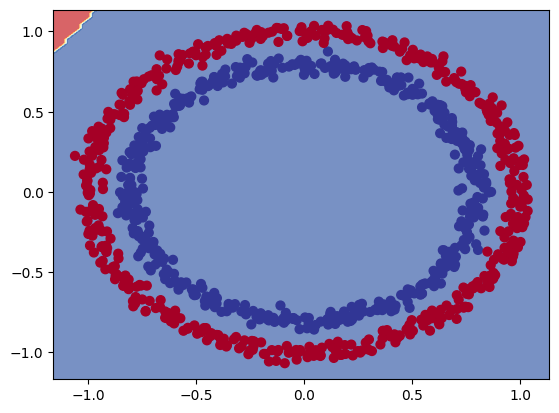

In [14]:
plot_decision_boundary(model, X, y)

### Improve model

In [15]:
# Adding another layer
model_2=tf.keras.Sequential([tf.keras.layers.Dense(1),
                           tf.keras.layers.Dense(1),])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
# for classification problem, we can use accuracy as oiur evaluation metric
model_2.fit(tf.constant(X), tf.constant(y),epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 3.1659 - accuracy: 0.4880
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7814 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7272 - accuracy: 0.4940
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7112 - accuracy: 0.4960
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7037 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6994 - accuracy: 0.5020
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6967 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.5130
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4950
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4970
Epoch 11/

In [16]:
model_2.evaluate(X,y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932935118675232, 0.5]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...


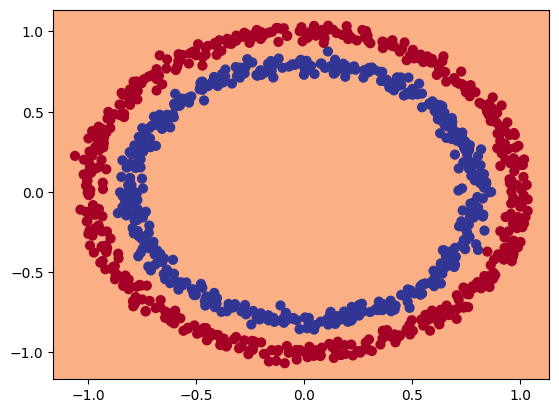

In [17]:
plot_decision_boundary(model_2, X, y)

In [18]:
## Adding multiple layers
# 1. Create a model
model_3=tf.keras.Sequential([
                              #  tf.keras.Input(shape=(None,2)),
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)])
# 2. Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# 3. Fitting a model
model_3.fit(tf.constant(X), tf.constant(y),epochs=100, verbose=0)
# 4. Evaluating a model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4980


[0.6936354041099548, 0.49799999594688416]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


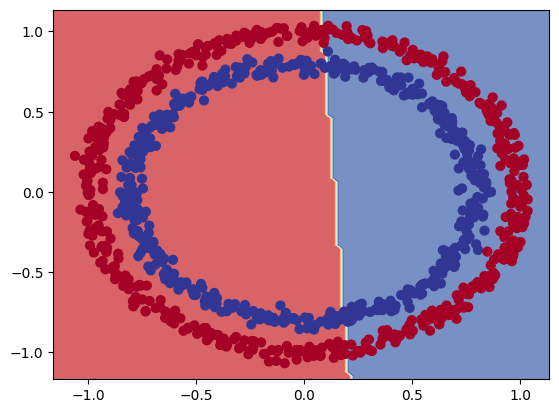

In [19]:
plot_decision_boundary(model_3, X, y)

### Improving our model for non linear data

In [20]:
# Adding non linear activation function in hidden layers
model_5=tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(2, activation="relu"),

                             tf.keras.layers.Dense(1)
                             ])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])
# for classification problem, we can use accuracy as oiur evaluation metric
history=model_5.fit(tf.constant(X), tf.constant(y),epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


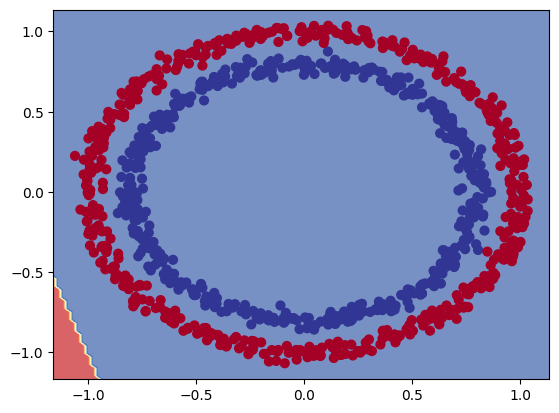

In [21]:
plot_decision_boundary(model_5, X, y)

In [22]:
# Adding non linear activation function in hidden layers and output layers

model_6=tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             ])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])
# for classification problem, we can use accuracy as oiur evaluation metric
history=model_6.fit(tf.constant(X), tf.constant(y),epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7003 - accuracy: 0.4930
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4730
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4730
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


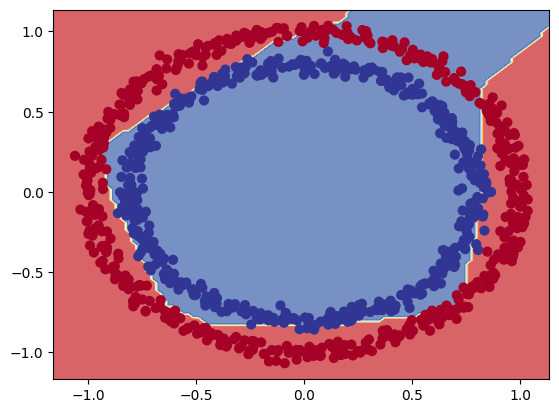

In [23]:
plot_decision_boundary(model_6, X, y)

### Improving model(Using Train and Test Splits)

In [24]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [25]:

# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6999 - accuracy: 0.4950
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5587
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5987
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6552 - accuracy: 0.6725
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6875
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.6675
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7563
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.7688
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.8012
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.8100
Epoch 11/25
25/25 [

In [26]:

# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 1.0000
Model loss on the test set: 0.050977837294340134
Model accuracy on the test set: 100.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


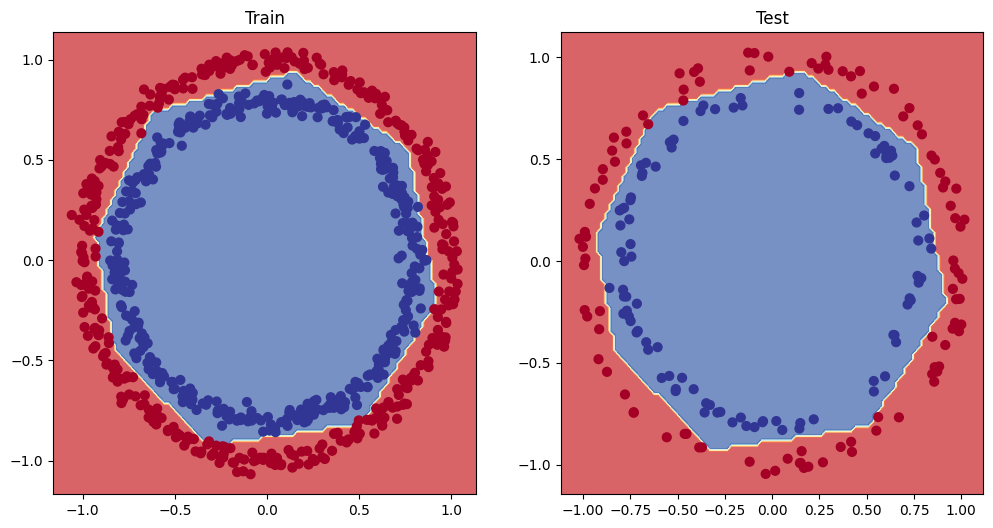

In [27]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss or training curve

In [28]:
pd.DataFrame()

""


Text(0.5, 1.0, 'Model_8 loss curves')

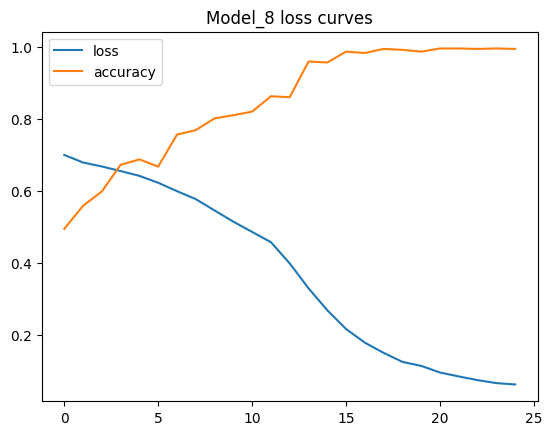

In [29]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

Finding the ideal learning rate(lr) :


1.   Create a learning rate schedular to try modeling on various learning rates
2.   Plot lrs vs loss and find the lr at which the loss is minimum

In [30]:
tf.random.set_seed(42)

# Create a model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# compiling a model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create learning rate callbacks
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 ** (epoch/20))

history_model_9= model_9.fit(X_train,y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7116 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7099 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7062 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7021 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Text(0.5, 1.0, 'Model 9 ')

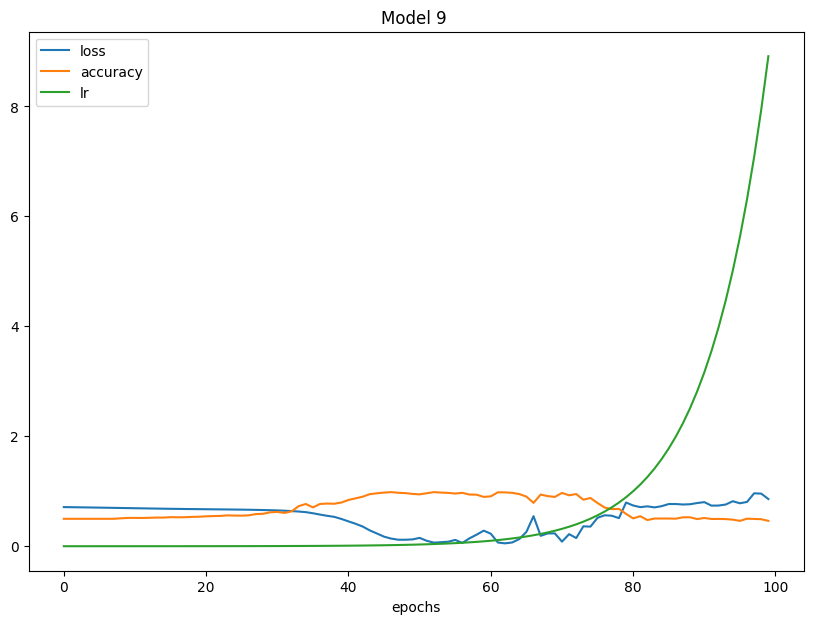

In [31]:
pd.DataFrame(history_model_9.history).plot(figsize=(10,7), xlabel="epochs")
plt.title("Model 9 ")

Text(0.5, 1.0, 'Learning rate vs. Loss')

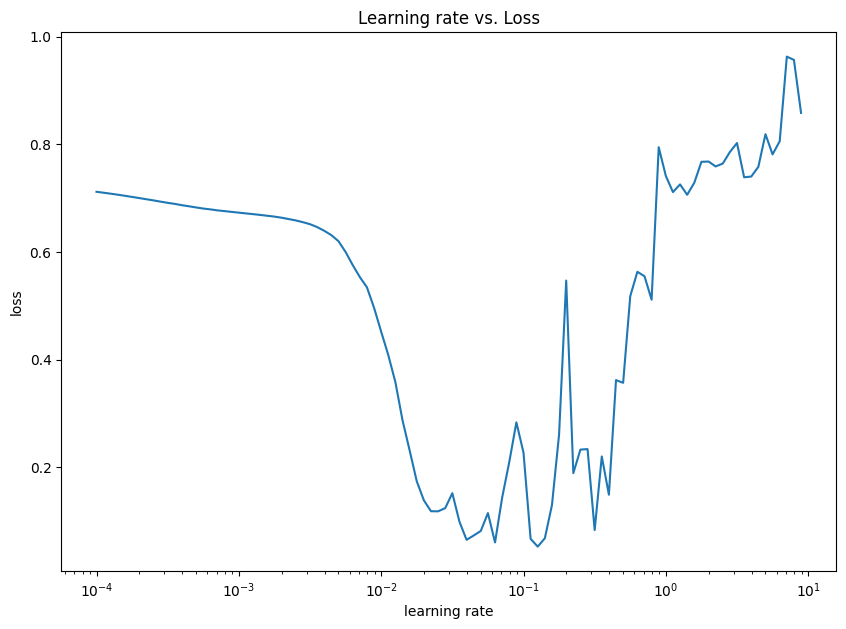

In [32]:
# Plot Learning rate versus loss
lrs=1e-4*(10**(tf.range(100)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_model_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs. Loss")

In [33]:
# Training and craeting rate for the ideal learning rate
tf.random.set_seed(42)

# Create a model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

# compiling a model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])


history_model_10= model_10.fit(X_train,y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6819 - accuracy: 0.5450
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6662
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6195 - accuracy: 0.7125
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5576 - accuracy: 0.7937
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4999 - accuracy: 0.8087
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.9075
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8925
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.9337
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9725
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1831 - accuracy: 0.9762
Epoch 11/

In [34]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9900


[0.023594021797180176, 0.9900000095367432]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


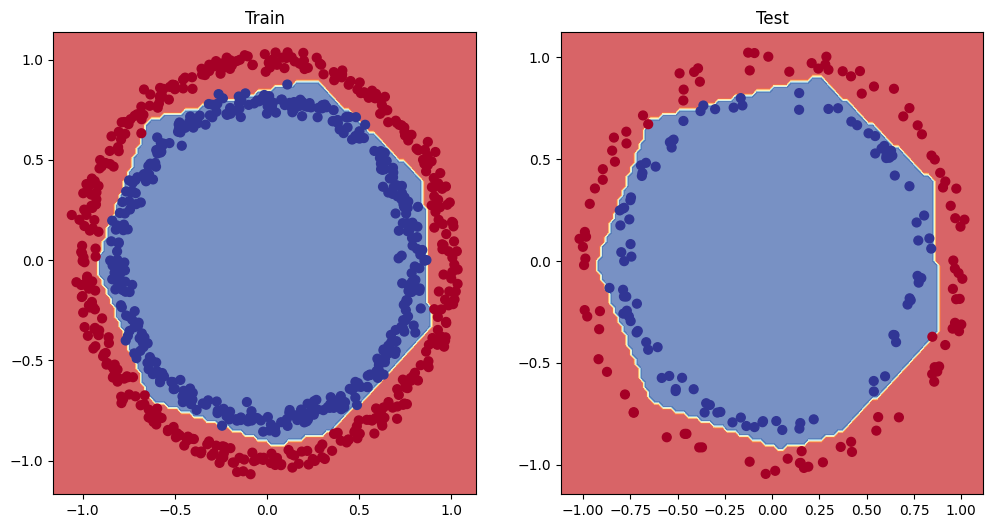

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)

### Classification evaluation methods


1.   Precision
1.   Recall
2.   Accuracy
2.   F1-Score
3.   Confusion Matrix



In [36]:
loss,accuracy=model_10.evaluate(X_test,y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set:{accuracy}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9900
Model loss on the test set:0.023594021797180176
Model accuracy on the test set:0.9900000095367432


In [37]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds=model_10.predict(X_test)
confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [38]:
y_test[:10]


array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [39]:
y_preds[:10]

array([[9.9796200e-01],
       [9.9807131e-01],
       [9.9804330e-01],
       [9.9807131e-01],
       [5.7746514e-05],
       [2.9251810e-06],
       [9.9807131e-01],
       [2.6571470e-07],
       [9.9807131e-01],
       [1.2517120e-03]], dtype=float32)

Prediction has a real value instead of binary values because of sigmoid function at out put layer

In [40]:
# convert our prediction probability to binary
y_preds=tf.round(y_preds)

In [41]:
y_preds

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [42]:
confusion_matrix(y_test,y_preds)

array([[99,  2],
       [ 0, 99]])

Now to prettify confusion matrix

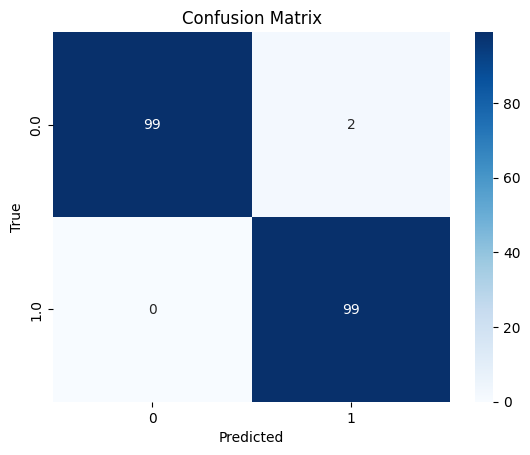

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_preds)

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_preds))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Working with multi-class classification problem



In [44]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Data has alreading splitted into training and test data sets

(train_data,train_labels),(test_data, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [45]:
print(train_data.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


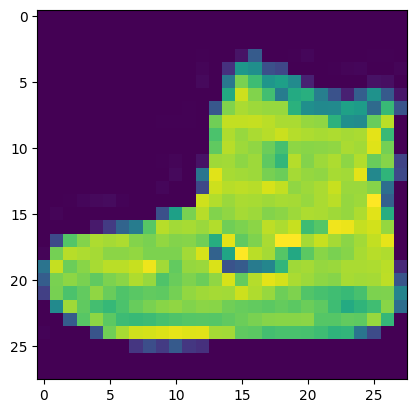

In [46]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [47]:
print(train_labels[0])

9


In [48]:
# Create a list so we can index our training labels to text names of classes
class_names=["T_shirt","Trousers","Pull_over","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle_Boot"]
len(class_names)

10

Text(0.5, 1.0, 'T_shirt')

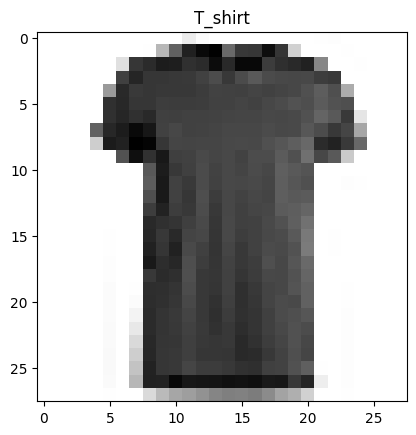

In [49]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

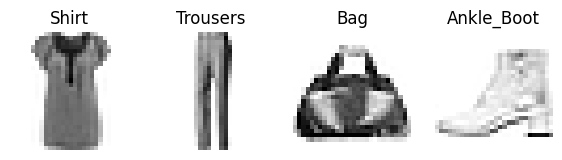

In [50]:
# Plot multiple random images of data sets
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(1,4,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification problem

In [51]:
# our data needs to be flatten 28*28 = 784
flatten= tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten.output_shape

(None, 784)

In [62]:
tf.random.set_seed(42)

# model creation
model_11=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4, activation ="relu"),
                             tf.keras.layers.Dense(4, activation ="relu"),
                             tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)]
)
# compilation_model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# fitting the data
history_non_norm=model_11.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2551 - accuracy: 0.1312 - val_loss: 2.1292 - val_accuracy: 0.1742
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7552 - accuracy: 0.2795 - val_loss: 1.6265 - val_accuracy: 0.3107
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5392 - accuracy: 0.3552 - val_loss: 1.4324 - val_accuracy: 0.4057
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3406 - accuracy: 0.4265 - val_loss: 1.3138 - val_accuracy: 0.4441
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2768 - accuracy: 0.4496 - val_loss: 1.2723 - val_accuracy: 0.4549
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2604 - accuracy: 0.4521 - val_loss: 1.2621 - val_accuracy: 0.4579
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2422 - accuracy: 0.4702 - val_loss: 1.2313 - val_accuracy:

In [53]:
model_11.evaluate(train_data,tf.one_hot(train_labels,depth=10))

1875/1875 [==============================] - 3s 2ms/step - loss: 1.4670 - accuracy: 0.3745


[1.4670449495315552, 0.37451666593551636]

In [54]:
model_11.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 3140      
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### In multiclass classification problem, there are two things to consider
-- for 2D data we have to use flatten layer.

-- For multiclass classification, use categoricalcrossentropy loss after doing one hot encoding on classes/labels.

In [55]:
# data normalization
train_data_norm=train_data/train_data.max()
test_data_norm=test_data/test_data.max()
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [59]:
#tf.random.set_seed(42)

# model creation
model_12=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(4, activation ="relu"),
                             tf.keras.layers.Dense(4, activation ="relu"),
                             tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)]
)
# compilation_model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# fitting the data
history_norm=model_12.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5591 - accuracy: 0.3795 - val_loss: 1.1172 - val_accuracy: 0.5931
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0160 - accuracy: 0.6102 - val_loss: 0.9693 - val_accuracy: 0.6258
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9162 - accuracy: 0.6377 - val_loss: 0.9032 - val_accuracy: 0.6491
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8581 - accuracy: 0.6629 - val_loss: 0.8684 - val_accuracy: 0.6685
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8275 - accuracy: 0.6831 - val_loss: 0.8415 - val_accuracy: 0.6905
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8048 - accuracy: 0.6973 - val_loss: 0.8362 - val_accuracy: 0.7030
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7855 - accuracy: 0.7085 - val_loss: 0.8109 - val_accuracy:

<Axes: title={'center': 'Normalized Data'}>

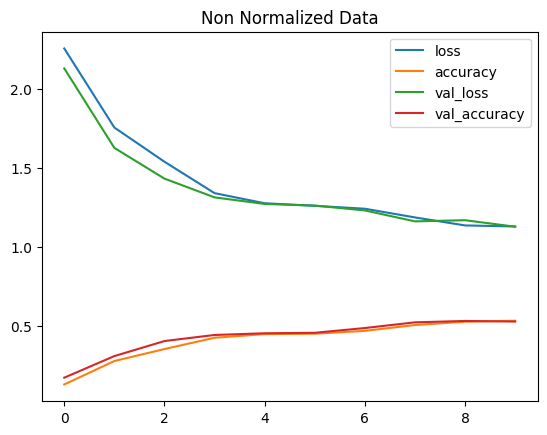

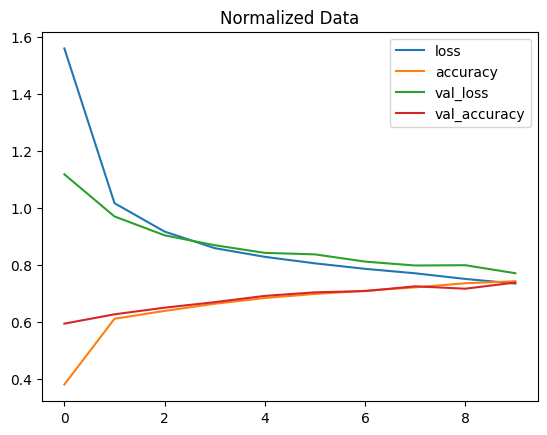

In [63]:
pd.DataFrame(history_non_norm.history).plot(title="Non Normalized Data")
pd.DataFrame(history_norm.history).plot(title="Normalized Data")

### Finding the ideal learning rate

In [66]:
tf.random.set_seed(42)

model_13=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fitting the data
history_model13 = model_13.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),callbacks=[lr_schedular])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 7.0321 - accuracy: 0.0615 - val_loss: 6.9792 - val_accuracy: 0.0157 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 8.1925 - accuracy: 0.0124 - val_loss: 9.6870 - val_accuracy: 0.0031 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6752 - accuracy: 0.0046 - val_loss: 9.6854 - val_accuracy: 0.0030 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 9.6778 - accuracy: 0.0045 - val_loss: 9.6854 - val_accuracy: 0.0030 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 9.6778 - accuracy: 0.0045 - val_loss: 9.6854 - val_accuracy: 0.0030 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.6778 - accuracy: 0.0045 - val_loss: 9.6854 - val_accuracy: 0.0030 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 7s

Text(0.5, 1.0, 'Find optimal learning rate')

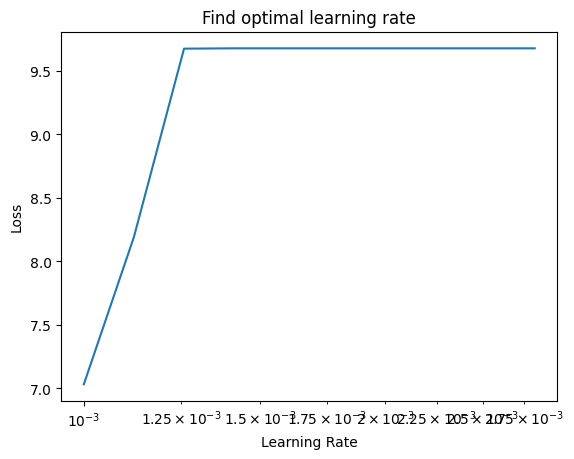

In [69]:
import numpy as np
import matplotlib.pyplot as plt

lrs=1e-3*(10**(tf.range(10)/20))
plt.semilogx(lrs,history_model13.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Find optimal learning rate")

Let's rebuild model at ideal learning_rate

In [75]:
tf.random.set_seed(42)

model_14=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

# lr_schedular=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

# fitting the data
history_model14 = model_14.fit(train_data_norm,
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3573 - accuracy: 0.4862 - val_loss: 1.0369 - val_accuracy: 0.6060
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9624 - accuracy: 0.6261 - val_loss: 0.9219 - val_accuracy: 0.6454
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8972 - accuracy: 0.6498 - val_loss: 0.8777 - val_accuracy: 0.6601
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8362 - accuracy: 0.6738 - val_loss: 0.8322 - val_accuracy: 0.6791
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8098 - accuracy: 0.6866 - val_loss: 0.8192 - val_accuracy: 0.6779
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7958 - accuracy: 0.6927 - val_loss: 0.8014 - val_accuracy: 0.6922
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7864 - accuracy: 0.6978 - val_loss: 0.8074 - val_accuracy

In [76]:
y_preds=model_14.predict(test_data_norm)

313/313 [==============================] - 2s 8ms/step


In [82]:
y_preds=y_preds.argmax(axis=1)

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

def confusion_matrix_custom(y_test,y_preds):
  cm = confusion_matrix(y_test, y_preds)

  # Create a heatmap from the confusion matrix
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

In [90]:
y_preds.shape

(10000,)

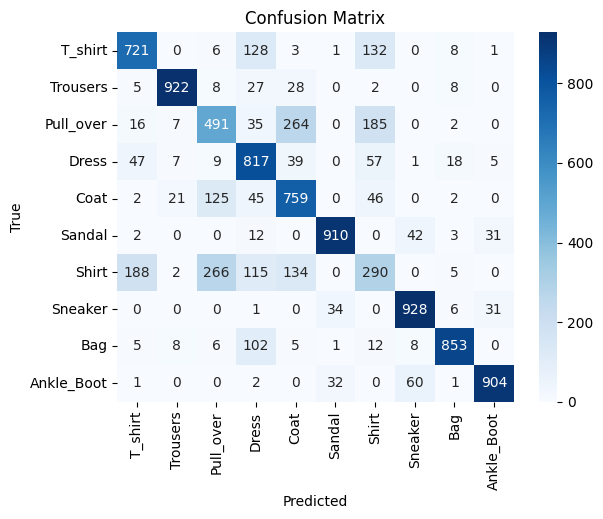

In [93]:
confusion_matrix_custom(test_labels,y_preds)

In [106]:
import random

def plot_random_image(model,images,true_labels,classes):
  i =random.randint(0,len(images))
  image=images[i]
  pred_probs=model.predict(image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]

  plt.imshow(image,cmap=plt.cm.binary)

  if pred_label == true_label:
    color="green"
  else:
    color="red"

  plt.xlabel(f"{pred_label} : {pred_probs.max()}",c=color)

1/1 [==============================] - 0s 23ms/step


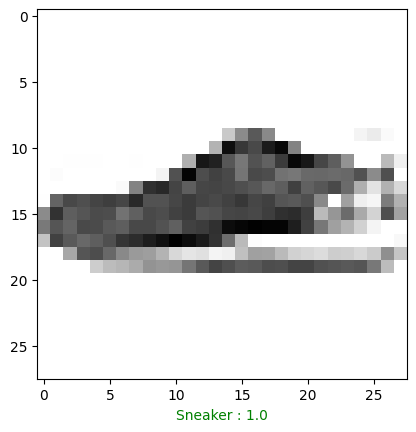

In [110]:
#
plot_random_image(model_14,test_data,test_labels,class_names)

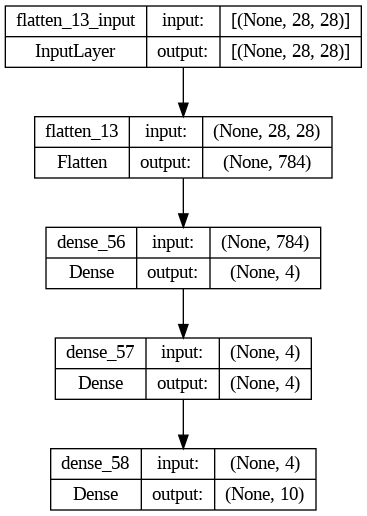

In [113]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)